In [2]:
df=pd.read_excel("E:\HTL Project\HTL Raw data.xlsx")
df.head()

<IPython.core.display.Javascript object>

,Feedstock,Type,Moisture,Volatile,Ash,Proteins,lipids,carbohydrates,C,H,...,O,S,Culture Condition,Catalyst,Temp,Time,Pressure,HHV,ERR,Yield%
0,Spirulina platensis,microalgae,11.8,67.0,8.6,53.0,7.5,11.0,72.7,8.8,...,11.5,0.6,open pond,Na2CO3,300,30,130,35.2,37.2,36.0
1,Nannochloropsis,microalgae,3.9,67.4,24.4,52.0,14.0,27.0,76.0,10.3,...,9.0,0.8,Flask,H-ZSM5,350,60,180,37.9,42.7,43.0
2,Chlorella vulgaris,microalgae,5.8,67.3,9.5,49.5,11.0,14.2,70.6,9.2,...,12.3,0.4,open pond,LiOH,250,60,100,33.8,33.0,33.0
3,Porphyridium purpureum,microalgae,8.5,61.6,18.5,45.6,12.1,NaN,69.1,8.4,...,15.2,0.5,PBR,NaN,250,30,100,34.8,41.5,24.7
4,Dunaliella tertiolecta,microalgae,4.9,54.4,13.5,34.0,23.0,21.0,72.0,8.8,...,9.9,0.3,NaN,Na2CO3,375,50,221,36.0,64.8,55.3


In [3]:
df.columns

Index(['Feedstock', 'Type', 'Moisture', 'Volatile', 'Ash', 'Proteins ',
       'lipids ', 'carbohydrates', 'C ', 'H', 'N', 'O', 'S',
       'Culture Condition', 'Catalyst', 'Temp', 'Time', 'Pressure', 'HHV',
       'ERR', 'Yield%'],
      dtype='object')

In [4]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [5]:
df['Feedstock']=le.fit_transform(df['Feedstock'])
df['Type']=le.fit_transform(df['Type'])
df['Culture Condition']=le.fit_transform(df['Culture Condition'])
df['Catalyst']=le.fit_transform(df['Catalyst'])

In [16]:
df.head()

,Feedstock,Type,Moisture,Volatile,Ash,Proteins,lipids,carbohydrates,C,H,...,O,S,Culture Condition,Catalyst,Temp,Time,Pressure,HHV,ERR,Yield%
0,21,1,11.8,67.0,8.6,53.0,7.5,11.0,72.7,8.8,...,11.5,0.6,3,14,300,30,130,35.2,37.2,36.0
1,10,1,3.9,67.4,24.4,52.0,14.0,27.0,76.0,10.3,...,9.0,0.8,0,7,350,60,180,37.9,42.7,43.0
2,3,1,5.8,67.3,9.5,49.5,11.0,14.2,70.6,9.2,...,12.3,0.4,3,11,250,60,100,33.8,33.0,33.0
3,12,1,8.5,61.6,18.5,45.6,12.1,35.2,69.1,8.4,...,15.2,0.5,1,22,250,30,100,34.8,41.5,24.7
4,7,1,4.9,54.4,13.5,34.0,23.0,21.0,72.0,8.8,...,9.9,0.3,4,14,375,50,221,36.0,64.8,55.3


In [7]:
df['Moisture']=df['Moisture'].fillna(df['Moisture'].mode()[0])
df['Volatile']=df['Volatile'].fillna(df['Volatile'].mode()[0])
df['carbohydrates']=df['carbohydrates'].fillna(df['carbohydrates'].mode()[0])
df['S']=df['S'].fillna(df['S'].mode()[0])
df['ERR']=df['ERR'].fillna(df['ERR'].mode()[0])
df['lipids ']=df['lipids '].fillna(df['lipids '].mode()[0])

# All Features Vs HHV

In [8]:
x=df.drop('HHV',axis=1)
y=df['HHV']

In [9]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
reg=linear_model.LinearRegression()
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)
y_pred
print("Mean absolute Error: " ,np.mean(np.absolute(y_pred-y_test)))
print("Root mean square error: " ,np.mean(y_pred-y_test)**2)
print("R2 square: " ,r2_score(y_pred,y_test))
reg1=linear_model.LinearRegression()
reg1.fit(x_train,y_train)
y_pred1 = reg1.predict(x_train)
y_pred
print("Mean absolute Error: " ,np.mean(np.absolute(y_pred1-y_train)))
print("Root mean square error: " ,np.mean(y_pred1-y_train)**2)
print("R2 square: " ,r2_score(y_pred1,y_train))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Mean absolute Error:  0.3190484147543313


<IPython.core.display.Javascript object>

Root mean square error:  0.0013583761022416204
R2 square:  0.9951596701276


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Mean absolute Error:  0.21743181332967873


<IPython.core.display.Javascript object>

Root mean square error:  3.865418435582958e-29
R2 square:  0.99592275048259


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

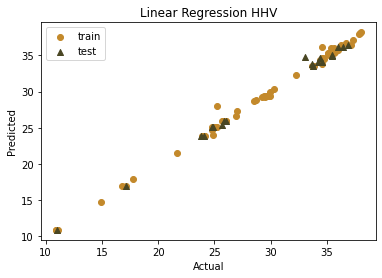

In [10]:
plt.scatter(y_pred1,y_train,label='train',color='#c3892b')
plt.scatter(y_pred,y_test,label='test',color='#494623',marker ="^")
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Linear Regression HHV")
plt.legend()

In [11]:
reg.predict([[3,1,5.8,67.3,9.5,49.5,11,14.2,58.8,6.5,6.7,27.3,0.2,3,19,350,60,180,28.6,28]])

array([26.16342144])

In [12]:
reg.predict([[18,1,6.9,68.5,25.5,53,13,13.5,73,8.2,5.7,12.6,0.5,2,4,350,60,180,26.5,27.1]])#Scenedesmus obliquus

array([34.0973478])

In [13]:
reg.predict([[23,0,10,72.3,11.9,8.4,4.3,35.2,51.4,10.2,0.8,36.4,0.2,1,4,380,60,150,17,22]])#Scenedesmus obliquus

array([25.78007835])

In [14]:
reg.predict([[15,1,6.7,78.9,6.4,51.7,21.8,15.9,52.3,7.4,7.5,31.7,0.1,2,16,300,60,180,50,34]])#Scenedesmus abundans

array([24.04269483])

In [15]:
reg.predict([[4,1,10,72.3,7.6,41.8,8.2,37.8,66.5,7.2,6.8,19,0.4,1,22,300,60,150,14.6,38.5]])#Chlorogloeopsis fritschii14

array([29.93129762])

In [25]:
data=df.corr()
data.head()

,Feedstock,Type,Moisture,Volatile,Ash,Proteins,lipids,carbohydrates,C,H,...,O,S,Culture Condition,Catalyst,Temp,Time,Pressure,HHV,ERR,Yield%
Feedstock,1.000000,-0.455413,0.376784,-0.054698,0.024029,-0.114043,-0.025388,0.112923,-0.142769,0.184214,...,0.188451,-0.233339,-0.412713,0.065943,0.206552,0.028945,-0.048738,-0.072195,-0.279980,-0.261382
Type,-0.455413,1.000000,-0.256343,-0.058361,-0.005466,0.761793,0.444409,-0.420750,0.442225,-0.340325,...,-0.334502,0.021681,0.361794,-0.098623,-0.338032,-0.255156,0.067949,0.259169,0.406987,0.469348
Moisture,0.376784,-0.256343,1.000000,0.119309,-0.280015,-0.401563,-0.472729,0.549915,-0.372128,-0.406572,...,0.481516,0.140300,0.115101,0.058381,0.191702,-0.304953,-0.025026,-0.459053,-0.408569,-0.283694
Volatile,-0.054698,-0.058361,0.119309,1.000000,-0.546402,-0.036462,-0.054567,-0.060277,-0.118548,0.113067,...,0.202678,0.387429,-0.003788,-0.016978,0.160503,-0.015952,0.043816,-0.091143,0.016302,-0.195049
Ash,0.024029,-0.005466,-0.280015,-0.546402,1.000000,-0.027673,0.070686,0.061754,-0.084943,-0.082840,...,-0.099744,-0.092561,-0.246517,-0.032529,-0.194984,0.105254,-0.034239,-0.064498,-0.124509,0.196888


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

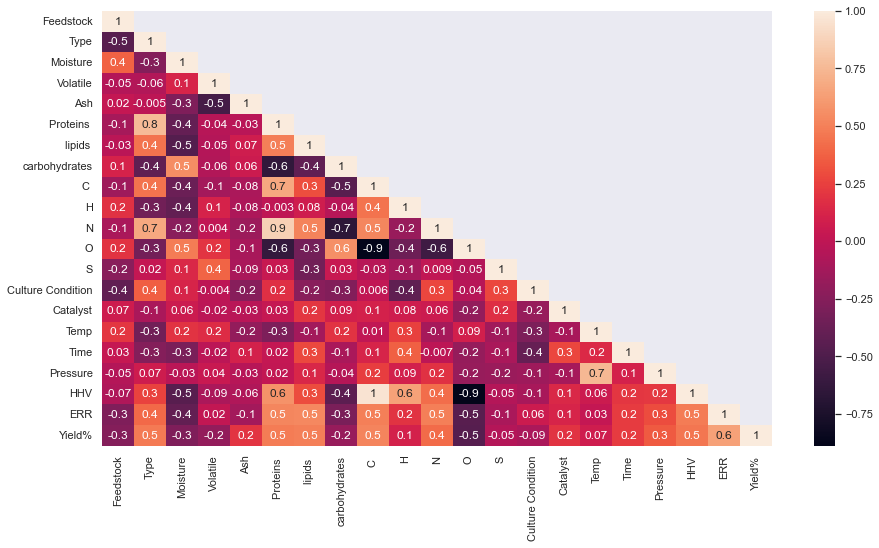

In [32]:
sns.set(rc={'figure.figsize':(15,8)})
df=data.where(np.tril(np.ones(data.shape)).astype(np.bool))
sns.heatmap(df,annot=True,fmt='.1g')